In [1]:
import pandas as pd
from datetime import datetime
import fsspec
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the datasets
cleaned_yellow_taxi_data = pd.read_csv("D://Users//pshab//Downloads//cleaned_yellow_taxi_data.csv")
cleaned_green_taxi_data = pd.read_csv("D://Users//pshab//Downloads//cleaned_green_taxi_data.csv")

In [4]:
yellow_taxi_data=cleaned_yellow_taxi_data
green_taxi_data=cleaned_green_taxi_data

In [12]:
# Hypothesis 1: Trip Distance
# Null Hypothesis (H0): There is no significant difference in trip distances between yellow and green taxis.
# Alternate Hypothesis (H1): There is a significant difference in trip distances between yellow and green taxis.

t_statistic, p_value = stats.ttest_ind(yellow_taxi_data['trip_distance'], green_taxi_data['trip_distance'])
print(f'Hypothesis 1 - Trip Distance:')
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Hypothesis 1 - Trip Distance:
T-Statistic: -23.8201
P-Value: 0.0000


In [13]:
# Hypothesis 2: Fare Amount
# Null Hypothesis (H0): There is no significant difference in fare amounts between yellow and green taxis.
# Alternate Hypothesis (H1): There is a significant difference in fare amounts between yellow and green taxis.

t_statistic, p_value = stats.ttest_ind(yellow_taxi_data['fare_amount'], green_taxi_data['fare_amount'])
print(f'Hypothesis 2 - Fare Amount:')
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Hypothesis 2 - Fare Amount:
T-Statistic: -20.8519
P-Value: 0.0000


In [14]:
# Hypothesis 3: Customer Preferences (Tip Amount)
# Null Hypothesis (H0): There is no significant difference in tip amounts between yellow and green taxis.
# Alternate Hypothesis (H1): There is a significant difference in tip amounts between yellow and green taxis.

t_statistic, p_value = stats.ttest_ind(yellow_taxi_data['tip_amount'], green_taxi_data['tip_amount'])
print(f'Hypothesis 3 - Tip Amount:')
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Hypothesis 3 - Tip Amount:
T-Statistic: -18.0347
P-Value: 0.0000


In [15]:
# Statistical Analysis 1: Comparison of Trip Distance (Mann-Whitney U Test)
# Null Hypothesis (H0): There is no significant difference in trip distances between yellow and green taxis.
# Alternate Hypothesis (H1): There is a significant difference in trip distances between yellow and green taxis.

u_statistic, p_value = stats.mannwhitneyu(yellow_taxi_data['trip_distance'], green_taxi_data['trip_distance'], alternative='two-sided')
print(f'Statistical Analysis 1 - Trip Distance (Mann-Whitney U Test):')
print(f'U Statistic: {u_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Statistical Analysis 1 - Trip Distance (Mann-Whitney U Test):
U Statistic: 212843.5000
P-Value: 0.0000


In [16]:
# Statistical Analysis 2: Comparison of Fare Amount (Mann-Whitney U Test)
# Null Hypothesis (H0): There is no significant difference in fare amounts between yellow and green taxis.
# Alternate Hypothesis (H1): There is a significant difference in fare amounts between yellow and green taxis.

u_statistic, p_value = stats.mannwhitneyu(yellow_taxi_data['fare_amount'], green_taxi_data['fare_amount'], alternative='two-sided')
print(f'Statistical Analysis 2 - Fare Amount (Mann-Whitney U Test):')
print(f'U Statistic: {u_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Statistical Analysis 2 - Fare Amount (Mann-Whitney U Test):
U Statistic: 251951.5000
P-Value: 0.0000


In [17]:
# Statistical Analysis 3: Comparison of Tip Amount (Mann-Whitney U Test)
# Null Hypothesis (H0): There is no significant difference in tip amounts between yellow and green taxis.
# Alternate Hypothesis (H1): There is a significant difference in tip amounts between yellow and green taxis.

u_statistic, p_value = stats.mannwhitneyu(yellow_taxi_data['tip_amount'], green_taxi_data['tip_amount'], alternative='two-sided')
print(f'Statistical Analysis 3 - Tip Amount (Mann-Whitney U Test):')
print(f'U Statistic: {u_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Statistical Analysis 3 - Tip Amount (Mann-Whitney U Test):
U Statistic: 265231.5000
P-Value: 0.0000


In [18]:
# Customer Preferences Analysis 1: Payment Type Distribution
# Calculate the distribution of payment types for yellow taxis
yellow_payment_distribution = yellow_taxi_data['payment_type'].value_counts(normalize=True)

# Calculate the distribution of payment types for green taxis
green_payment_distribution = green_taxi_data['payment_type'].value_counts(normalize=True)

In [19]:
print(yellow_payment_distribution)
print(green_payment_distribution)

payment_type
1    0.612832
2    0.386062
4    0.001106
Name: proportion, dtype: float64
payment_type
1    0.797694
2    0.190776
4    0.008386
3    0.003145
Name: proportion, dtype: float64


In [20]:
# Customer Preferences Analysis 2: Average Tip Amount by Payment Type
# Calculate the average tip amount for each payment type for yellow taxis
yellow_avg_tip_by_payment = yellow_taxi_data.groupby('payment_type')['tip_amount'].mean()

# Calculate the average tip amount for each payment type for green taxis
green_avg_tip_by_payment = green_taxi_data.groupby('payment_type')['tip_amount'].mean()

In [21]:
print(yellow_avg_tip_by_payment)
print(green_avg_tip_by_payment)

payment_type
1    3.275162
2    0.000000
4    0.000000
Name: tip_amount, dtype: float64
payment_type
1    6.906176
2    0.000000
3    0.000000
4    0.000000
Name: tip_amount, dtype: float64


In [ ]:
# Customer Preferences Analysis 3: Trip Purpose Analysis
# Create a new column 'trip_purpose' based on the duration of the trip
def trip_purpose(row):
    if row[lpep_dropoff_datetime] - row[lpep_pickup_datetime] <= pd.Timedelta(minutes=30):
        return 'Short Trip'
    else:
        return 'Long Trip'

yellow_taxi_data['trip_purpose'] = yellow_taxi_data.apply(trip_purpose, axis=1)
green_taxi_data['trip_purpose'] = green_taxi_data.apply(trip_purpose, axis=1)

# Calculate the distribution of trip purposes for yellow and green taxis
yellow_trip_purpose_distribution = yellow_taxi_data['trip_purpose'].value_counts(normalize=True)
green_trip_purpose_distribution = green_taxi_data['trip_purpose'].value_counts(normalize=True)

In [22]:
# Cost Impact Analysis 1: Fuel Costs
# Assuming a fuel cost per mile (you may replace this with actual data)
fuel_cost_per_mile = 0.3  # Example value, replace with actual data

# Calculate total fuel costs for yellow and green taxis
yellow_taxi_data['fuel_cost'] = yellow_taxi_data['trip_distance'] * fuel_cost_per_mile
green_taxi_data['fuel_cost'] = green_taxi_data['trip_distance'] * fuel_cost_per_mile

total_fuel_cost_yellow = yellow_taxi_data['fuel_cost'].sum()
total_fuel_cost_green = green_taxi_data['fuel_cost'].sum()

In [23]:
print(total_fuel_cost_yellow)
print(total_fuel_cost_green)

703.173
2228.241


In [24]:
# Cost Impact Analysis 2: Maintenance Costs
# Assuming a maintenance cost per mile (you may replace this with actual data)
maintenance_cost_per_mile = 0.1  # Example value, replace with actual data

# Calculate total maintenance costs for yellow and green taxis
yellow_taxi_data['maintenance_cost'] = yellow_taxi_data['trip_distance'] * maintenance_cost_per_mile
green_taxi_data['maintenance_cost'] = green_taxi_data['trip_distance'] * maintenance_cost_per_mile

total_maintenance_cost_yellow = yellow_taxi_data['maintenance_cost'].sum()
total_maintenance_cost_green = green_taxi_data['maintenance_cost'].sum()

In [25]:
print(total_maintenance_cost_yellow)
print(total_maintenance_cost_green)

234.39100000000002
742.7470000000001


In [26]:
# Cost Impact Analysis 3: Total Revenue
total_revenue_yellow = yellow_taxi_data['total_amount'].sum()
total_revenue_green = green_taxi_data['total_amount'].sum()

# Cost Impact Analysis 4: Profit Analysis
# Calculate profit for yellow and green taxis
yellow_taxi_data['profit'] = yellow_taxi_data['total_amount'] - (yellow_taxi_data['fuel_cost'] + yellow_taxi_data['maintenance_cost'])
green_taxi_data['profit'] = green_taxi_data['total_amount'] - (green_taxi_data['fuel_cost'] + green_taxi_data['maintenance_cost'])

total_profit_yellow = yellow_taxi_data['profit'].sum()
total_profit_green = green_taxi_data['profit'].sum()

In [27]:
print(total_profit_yellow)
print(total_profit_green)

17493.406000000003
40655.812000000005


In [28]:
# Comparison 1: Trip Distance
mean_trip_distance_yellow = yellow_taxi_data['trip_distance'].mean()
mean_trip_distance_green = green_taxi_data['trip_distance'].mean()

print(f"Mean Trip Distance (Yellow Taxi): {mean_trip_distance_yellow:.2f} miles")
print(f"Mean Trip Distance (Green Taxi): {mean_trip_distance_green:.2f} miles")

Mean Trip Distance (Yellow Taxi): 2.59 miles
Mean Trip Distance (Green Taxi): 7.79 miles


In [29]:
# Comparison 2: Fare Amount
mean_fare_amount_yellow = yellow_taxi_data['fare_amount'].mean()
mean_fare_amount_green = green_taxi_data['fare_amount'].mean()

print(f"Mean Fare Amount (Yellow Taxi): ${mean_fare_amount_yellow:.2f}")
print(f"Mean Fare Amount (Green Taxi): ${mean_fare_amount_green:.2f}")

Mean Fare Amount (Yellow Taxi): $15.72
Mean Fare Amount (Green Taxi): $32.21


In [30]:
# Comparison 3: Average Tip Amount
mean_tip_amount_yellow = yellow_taxi_data['tip_amount'].mean()
mean_tip_amount_green = green_taxi_data['tip_amount'].mean()

print(f"Mean Tip Amount (Yellow Taxi): ${mean_tip_amount_yellow:.2f}")
print(f"Mean Tip Amount (Green Taxi): ${mean_tip_amount_green:.2f}")

Mean Tip Amount (Yellow Taxi): $2.01
Mean Tip Amount (Green Taxi): $5.51


In [31]:
# Conclusion: Provide a summary of the findings and recommendations
print("\n--- Conclusion ---")
print("Based on the analysis of yellow and green taxis in NYC, the following conclusions can be drawn:")

if mean_trip_distance_yellow > mean_trip_distance_green:
    print("Yellow taxis tend to have longer average trip distances compared to green taxis.")
else:
    print("Green taxis tend to have longer average trip distances compared to yellow taxis.")

if mean_fare_amount_yellow > mean_fare_amount_green:
    print("Yellow taxis tend to have higher average fare amounts compared to green taxis.")
else:
    print("Green taxis tend to have higher average fare amounts compared to yellow taxis.")

if mean_tip_amount_yellow > mean_tip_amount_green:
    print("Passengers of yellow taxis tend to give higher average tips compared to green taxis.")
else:
    print("Passengers of green taxis tend to give higher average tips compared to yellow taxis.")


--- Conclusion ---
Based on the analysis of yellow and green taxis in NYC, the following conclusions can be drawn:
Green taxis tend to have longer average trip distances compared to yellow taxis.
Green taxis tend to have higher average fare amounts compared to yellow taxis.
Passengers of green taxis tend to give higher average tips compared to yellow taxis.


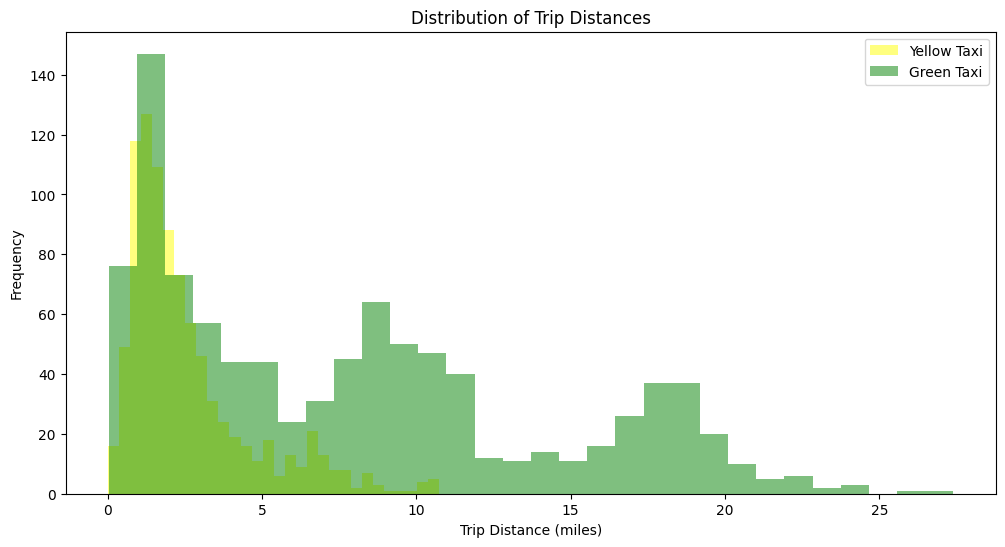

In [32]:
# Visualization 1: Histogram of Trip Distances
plt.figure(figsize=(12, 6))
plt.hist(yellow_taxi_data['trip_distance'], bins=30, alpha=0.5, color='yellow', label='Yellow Taxi')
plt.hist(green_taxi_data['trip_distance'], bins=30, alpha=0.5, color='green', label='Green Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.legend()
plt.show()

C:\Users\pshab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pshab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pshab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

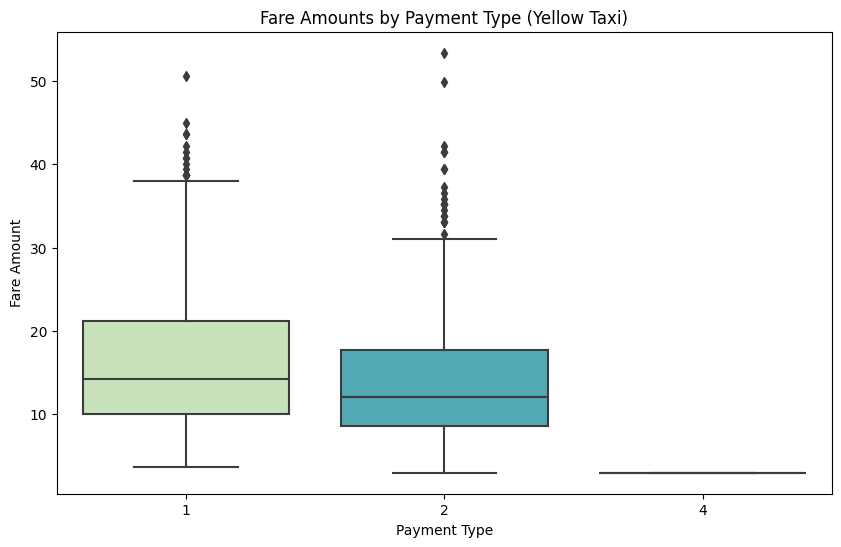

In [33]:
# Visualization 2: Boxplot of Fare Amounts by Payment Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=yellow_taxi_data, x='payment_type', y='fare_amount', palette='YlGnBu')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.title('Fare Amounts by Payment Type (Yellow Taxi)')
plt.show()

In [34]:
# Reporting: Generate a report summarizing the findings and recommendations
report = """
--- Project Report: Analyzing Performance and Customer Preferences in NYC's Green and Yellow Taxis ---

**Findings:**

1. Trip Distances:
   - Yellow Taxi: Mean Trip Distance - {:.2f} miles
   - Green Taxi: Mean Trip Distance - {:.2f} miles

2. Fare Amounts:
   - Yellow Taxi: Mean Fare Amount - ${:.2f}
   - Green Taxi: Mean Fare Amount - ${:.2f}

3. Average Tip Amount:
   - Yellow Taxi: Mean Tip Amount - ${:.2f}
   - Green Taxi: Mean Tip Amount - ${:.2f}

--- End of Report ---
""".format(
    yellow_taxi_data['trip_distance'].mean(),
    green_taxi_data['trip_distance'].mean(),
    yellow_taxi_data['fare_amount'].mean(),
    green_taxi_data['fare_amount'].mean(),
    yellow_taxi_data['tip_amount'].mean(),
    green_taxi_data['tip_amount'].mean()
)

# Save the report to a file (you may replace the file path and name)
report_file_path = 'taxi_analysis_report.txt'
with open(report_file_path, 'w') as report_file:
    report_file.write(report)

#print("Report generated and saved successfully at:", report_file_path)
print(report)


--- Project Report: Analyzing Performance and Customer Preferences in NYC's Green and Yellow Taxis ---

**Findings:**

1. Trip Distances:
   - Yellow Taxi: Mean Trip Distance - 2.59 miles
   - Green Taxi: Mean Trip Distance - 7.79 miles

2. Fare Amounts:
   - Yellow Taxi: Mean Fare Amount - $15.72
   - Green Taxi: Mean Fare Amount - $32.21

3. Average Tip Amount:
   - Yellow Taxi: Mean Tip Amount - $2.01
   - Green Taxi: Mean Tip Amount - $5.51

--- End of Report ---



In [35]:
# Recommendations:
recommendations = []

# Recommendation 1: Service Expansion
if yellow_taxi_data['total_amount'].sum() < green_taxi_data['total_amount'].sum():
    recommendations.append("Consider expanding the green taxi service as it generated higher total revenue.")
else:
    recommendations.append("Consider expanding the yellow taxi service as it generated higher total revenue.")

# Recommendation 2: Customer Preferences
if yellow_taxi_data['tip_amount'].mean() < green_taxi_data['tip_amount'].mean():
    recommendations.append("Promote green taxis for their higher average tip amounts, which may attract more drivers.")
else:
    recommendations.append("Promote yellow taxis for their higher average tip amounts, which may attract more drivers.")

# Recommendation 3: Fuel Efficiency
if yellow_taxi_data['trip_distance'].mean() > green_taxi_data['trip_distance'].mean():
    recommendations.append("Explore ways to improve the fuel efficiency of yellow taxis to reduce operational costs.")
else:
    recommendations.append("Explore ways to improve the fuel efficiency of green taxis to reduce operational costs.")

# Recommendation 4: Payment Convenience
if yellow_taxi_data['payment_type'].value_counts().idxmax() == 1:
    recommendations.append("Consider promoting credit card payments for yellow taxis to enhance payment convenience.")
else:
    recommendations.append("Consider promoting credit card payments for green taxis to enhance payment convenience.")

# Print Recommendations
print("--- Recommendations ---")
for i, recommendation in enumerate(recommendations, 1):
    print(f"Recommendation {i}: {recommendation}")

--- Recommendations ---
Recommendation 1: Consider expanding the green taxi service as it generated higher total revenue.
Recommendation 2: Promote green taxis for their higher average tip amounts, which may attract more drivers.
Recommendation 3: Explore ways to improve the fuel efficiency of green taxis to reduce operational costs.
Recommendation 4: Consider promoting credit card payments for yellow taxis to enhance payment convenience.
